In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.colors as mcolors
color = mcolors.TABLEAU_COLORS #顏色變化
import seaborn as sns
from datetime import date
import os

### 發文數量統計

In [2]:
df_article_time = pd.read_csv(r".\Original_Data\6ckip斷詞\Break_Word_all_Article_Summary.csv")
df_article_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Author      339 non-null    object
 1   Title       341 non-null    object
 2   Year        341 non-null    int64 
 3   Month       341 non-null    int64 
 4   Day         341 non-null    int64 
 5   Time        341 non-null    object
 6   Data        341 non-null    object
 7   Content     341 non-null    object
 8   Break_word  341 non-null    object
 9   POS_tags    341 non-null    object
dtypes: int64(3), object(7)
memory usage: 26.8+ KB


2021-02     1
2021-09     2
2021-10    32
2021-11    28
2021-12    24
2022-01    34
2022-02    27
2022-03    12
2022-04     5
2022-05    22
2022-06    62
2022-07    21
2022-08     2
2022-09     4
2022-10     4
2022-11    48
2022-12     8
Freq: M, Name: year_month, dtype: int64


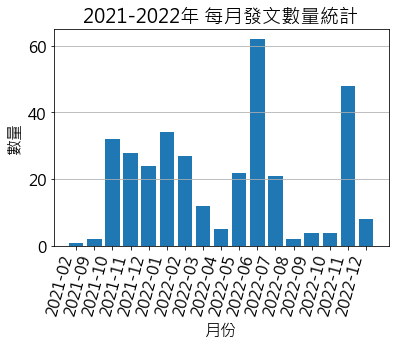

In [22]:
# 將 'data' 欄位轉換為日期時間格式
df_article_time['Data'] = pd.to_datetime(df_article_time['Data'])

# 選取 2021-2022 年的資料
start_date = '2021-01-01'
end_date = '2022-12-31'
mask = (df_article_time['Data'] >= start_date) & (df_article_time['Data'] <= end_date)
df_article_time = df_article_time.loc[mask]

# 新增 'year_month' 欄位，表示每則留言的年月份
df_article_time['year_month'] = df_article_time['Data'].dt.to_period('M')

# 繪製每月的留言數量圖形
monthly_count = df_article_time['year_month'].value_counts().sort_index()
print(monthly_count)


# 設定全局字型大小為 16
plt.rcParams.update({'font.size': 16})

# 繪製每月的留言數量柱狀圖
plt.bar(monthly_count.index.astype(str), monthly_count.values)

plt.title('2021-2022年 每月發文數量統計')
plt.xlabel('月份')
plt.ylabel('數量')

plt.xticks(rotation=75, ha='right')
plt.grid(axis='y')

# 保存圖形為 PNG 格式
# plt.savefig(f'./Original_Data/6ckip斷詞/2021_2022monthly_post_counts.png',dpi=300, bbox_inches='tight')
plt.show()

### 留言數量統計

In [12]:
df_comment_time = pd.read_csv(r".\PTT_data\Data preprocessing\Break_Word_all_Comment_job.csv")
df_comment_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10245 entries, 0 to 10244
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        10211 non-null  object
 1   title         10245 non-null  object
 2   year          10245 non-null  int64 
 3   month         10245 non-null  int64 
 4   date          10245 non-null  int64 
 5   time          10244 non-null  object
 6   message_data  10245 non-null  object
 7   message       10176 non-null  object
 8   留言日期          10245 non-null  object
 9   message_day   10245 non-null  object
 10  message_time  10244 non-null  object
 11  message_ip    10243 non-null  object
 12  type          10245 non-null  object
 13  Break_word    10103 non-null  object
 14  POS_tags      10103 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.2+ MB


In [13]:
df_comment_time.head(1)

,author,title,year,month,date,time,message_data,message,留言日期,message_day,message_time,message_ip,type,Break_word,POS_tags
0,deeeplove (巴達獸 可愛d(`･∀･)b),[新聞] 韋禮安投資加密貨幣慘跌 認了「身家都,2022,1,6,09:41,2022/1/6,他發有人買嗎,2022-01-06,1月6日,09:41,59.115.52.66,推,"發,有,人,買","發 VD,有 V_2,人 Na,買 VC"


2021-01       2
2021-02      19
2021-03       6
2021-05       2
2021-07       1
2021-09      41
2021-10     648
2021-11     657
2021-12     507
2022-01    1229
2022-02     708
2022-03     462
2022-04      69
2022-05     523
2022-06    2339
2022-07     379
2022-08     134
2022-09     128
2022-10     126
2022-11    1890
2022-12     292
Freq: M, Name: year_month, dtype: int64


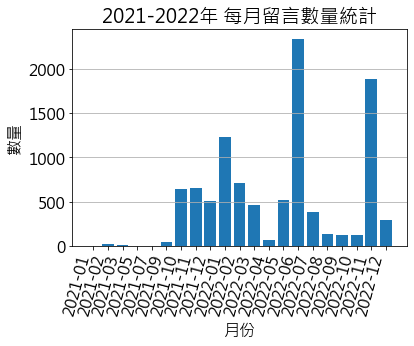

In [ ]:
df_comment_time = pd.read_csv(r".\Original_Data\6ckip斷詞\Break_Word_all_Comment.csv")
# 將 'data' 欄位轉換為日期時間格式
df_comment_time['data'] = pd.to_datetime(df_comment_time['留言日期'])

# 選取 2021-2022 年的資料
start_date = '2021-01-01'
end_date = '2022-12-31'
mask = (df_comment_time['data'] >= start_date) & (df_comment_time['data'] <= end_date)
df_comment_time = df_comment_time.loc[mask]

# 新增 'year_month' 欄位，表示每則留言的年月份
df_comment_time['year_month'] = df_comment_time['data'].dt.to_period('M')

# 繪製每月的留言數量圖形
monthly_count = df_comment_time['year_month'].value_counts().sort_index()
print(monthly_count)

# fig = plt.figure(figsize=(8,6))
# 設定全局字型大小為 14
plt.rcParams.update({'font.size': 16})

# 繪製每月的留言數量柱狀圖
plt.bar(monthly_count.index.astype(str), monthly_count.values)
    
plt.title('2021-2022年 每月留言數量統計')
plt.xlabel('月份')
plt.ylabel('數量')

plt.xticks(rotation=75, ha='right')
plt.grid(axis='y')
# 保存圖形為 PNG 格式
plt.savefig(f'./Original_Data/6ckip斷詞/2021_2022monthly_comment_counts.png',dpi=300, bbox_inches='tight')
plt.show()

2022-01    1211
2022-02     699
2022-03     458
2022-04      69
2022-05     514
2022-06    2311
2022-07     374
2022-08     129
2022-09     127
2022-10     122
2022-11    1867
2022-12     287
Freq: M, Name: year_month, dtype: int64


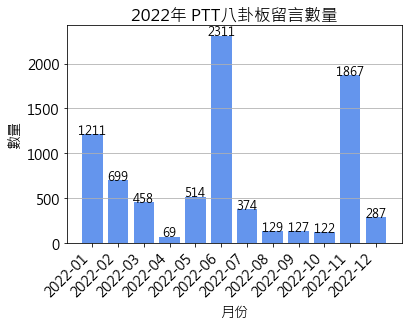

In [27]:
df_comment_time = pd.read_csv(r".\PTT_data\Data preprocessing\2022_comment_job.csv")
# 將 'data' 欄位轉換為日期時間格式
df_comment_time['data'] = pd.to_datetime(df_comment_time['留言日期'])

# 選取 2022 年的資料
start_date = '2022-01-01'
end_date = '2022-12-31'
mask = (df_comment_time['data'] >= start_date) & (df_comment_time['data'] <= end_date)
df_comment_time = df_comment_time.loc[mask]

# 新增 'year_month' 欄位，表示每則留言的年月份
df_comment_time['year_month'] = df_comment_time['data'].dt.to_period('M')

# 繪製每月的留言數量圖形
monthly_count = df_comment_time['year_month'].value_counts().sort_index()
print(monthly_count)

# 設定全局字型大小為 14
plt.rcParams.update({'font.size': 14})

# 繪製每月的留言數量柱狀圖
plt.bar(monthly_count.index.astype(str), monthly_count.values,color='#6495ED')

# 添加數字標籤
for i, v in enumerate(monthly_count.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=12)    

plt.title('2022年 PTT八卦板留言數量')
plt.xlabel('月份')
plt.ylabel('數量')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# 保存圖形為 PNG 格式
plt.savefig(f'./Original_Data/6ckip斷詞/2022CKIP_monthly_comment_counts.png',dpi=300, bbox_inches='tight')

plt.show()

### 留言種類統計

In [26]:
df_comment_type = pd.read_csv(r".\PTT_data\Data preprocessing\Break_Word_all_Comment_job.csv")
df_comment_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10245 entries, 0 to 10244
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        10211 non-null  object
 1   title         10245 non-null  object
 2   year          10245 non-null  int64 
 3   month         10245 non-null  int64 
 4   date          10245 non-null  int64 
 5   time          10244 non-null  object
 6   data          10245 non-null  object
 7   message       10176 non-null  object
 8   message_day   10243 non-null  object
 9   message_time  10244 non-null  object
 10  message_ip    10243 non-null  object
 11  type          10245 non-null  object
 12  Break_word    10144 non-null  object
 13  POS_tags      10144 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.1+ MB


箭頭    3927
推     3711
噓      641
Name: type, dtype: int64


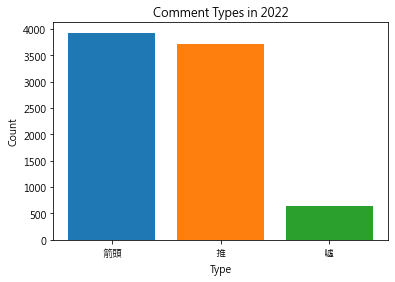

In [ ]:
# 新增欄位表示年份
df_comment_type['data'] = pd.to_datetime(df_comment_type['data']).dt.year

# 篩選出 2022 年的留言資料
df_2022 = df_comment_type[df_comment_type['data'] == 2022]

# 計算推需箭頭的數量
counts = df_2022['type'].value_counts()
print(counts)
# 繪製長條圖

plt.bar(counts.index, counts.values, color=color)
plt.title('Comment Types in 2022')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

In [4]:
counts = df_comment_type['type'].value_counts()
print(counts)

箭頭    4952
推     4462
噓      831
Name: type, dtype: int64


In [27]:
df_comment_type.isnull().sum()

author           34
title             0
year              0
month             0
date              0
time              1
data              0
message          69
message_day       2
message_time      1
message_ip        2
type              0
Break_word      101
POS_tags        101
dtype: int64

In [28]:
df_comment_type.dropna(inplace=True)
df_comment_type.shape

(10109, 14)

In [29]:
#確認清楚刪除了
df_comment_type[df_comment_type["Break_word"].isnull()].shape

(0, 14)

In [30]:
df_comment_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10109 entries, 0 to 10244
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        10109 non-null  object
 1   title         10109 non-null  object
 2   year          10109 non-null  int64 
 3   month         10109 non-null  int64 
 4   date          10109 non-null  int64 
 5   time          10109 non-null  object
 6   data          10109 non-null  object
 7   message       10109 non-null  object
 8   message_day   10109 non-null  object
 9   message_time  10109 non-null  object
 10  message_ip    10109 non-null  object
 11  type          10109 non-null  object
 12  Break_word    10109 non-null  object
 13  POS_tags      10109 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.2+ MB


In [70]:
df_comment_type['type'].count()

10109

In [71]:
counts = df_comment_type['type'].value_counts()
print(counts)

箭頭    4892
推     4400
噓      817
Name: type, dtype: int64


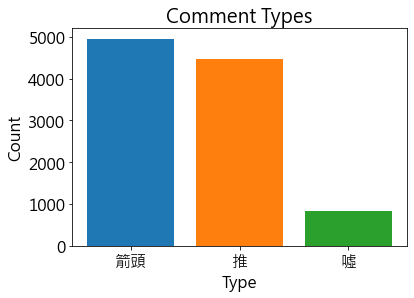

In [63]:
#這邊是在看2021-2023全部種類數量
counts = df_comment_type['type'].value_counts()

plt.bar(counts.index, counts.values,color=color)
plt.title('Comment Types')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

箭頭    3878
推     3656
噓      630
Name: type, dtype: int64


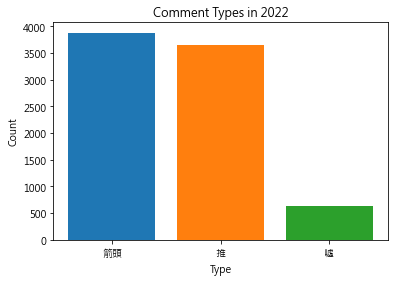

In [31]:
#這邊特別取出2022年份種類了解占比多少

# 新增欄位表示年份
df_comment_type['data'] = pd.to_datetime(df_comment_type['data']).dt.year

# 篩選出 2022 年的留言資料
df_2022 = df_comment_type[df_comment_type['data'] == 2022]

# 計算推需箭頭的數量
counts = df_2022['type'].value_counts()
print(counts)
# 繪製長條圖

plt.bar(counts.index, counts.values, color=color)
plt.title('Comment Types in 2022')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()